<a href="https://colab.research.google.com/github/tathiyennhi/tathiyennhi.github.io/blob/main/analytics-final-report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dùng multi naive bayes để thực hiện xác định số lượng tiêu cực tích cực hay trung lập của một comment

Mẫu dữ liệu đầu tiên:
   Unnamed: 0                              reviewid           username  \
0     1867152  d35bbf0c-6536-40ff-9bf7-cffd6e39fcb2  Người dùng Google   
1     1867150  68d7b86e-b3b5-4d8a-9f2b-7c5f0727070b  Người dùng Google   
2     1867173  78354012-2f68-4906-9657-e5afbf5279ef  Người dùng Google   
3     1867114  07af3459-eaf6-4ed6-a217-2af88de7af22  Người dùng Google   
4     1867138  31b7e570-ebdd-4b33-b4f9-307f1232496c  Người dùng Google   

                                           userimage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsupcount  \
0  nhan duoc e-mail la 400k, cai xong bao co 300k...    2.0            2.0   
1  Tôi đặt hàng mua máy ảnh fujifilm s45

<ipython-input-2-1a9a860c5ccf>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = np.where(df['score'] >= 4, 'Tích cực', np.where(df['score'] <= 2, 'Tiêu cực', 'Trung lập'))


Độ chính xác của mô hình: 0.7969410999023755
Báo cáo phân loại:
              precision    recall  f1-score   support

    Tiêu cực       0.59      0.77      0.67       618
   Trung lập       0.17      0.03      0.05       251
    Tích cực       0.88      0.89      0.89      2204

    accuracy                           0.80      3073
   macro avg       0.55      0.56      0.54      3073
weighted avg       0.77      0.80      0.78      3073



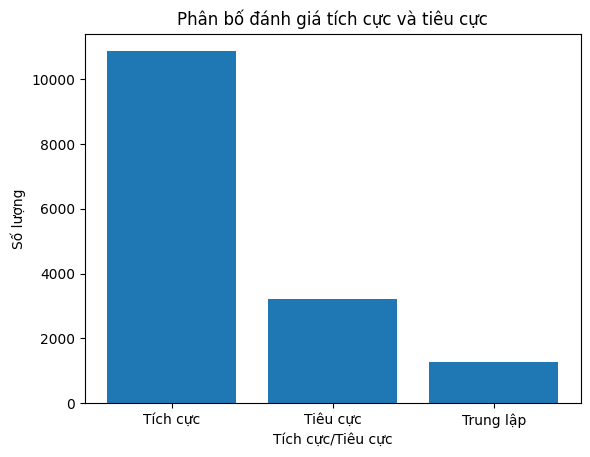

In [ ]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Đường dẫn tới file csv
data_url = "/10k_vietnamese_ecommerce_review.csv"

# Đọc dữ liệu từ file csv
df = pd.read_csv(data_url)

# Xem thông tin cơ bản về dữ liệu
print("Mẫu dữ liệu đầu tiên:")
print(df.head())
print("\nThông tin về dữ liệu:")
print(df.info())

# Tiền xử lý dữ liệu
# Giữ lại các cột cần thiết: nội dung và điểm đánh giá
df = df[['content', 'score']]
# Loại bỏ các dòng có giá trị bị thiếu
df = df.dropna()

# Chuẩn hóa nhãn tích cực (score >= 4) và tiêu cực (score <= 2)
df['sentiment'] = np.where(df['score'] >= 4, 'Tích cực', np.where(df['score'] <= 2, 'Tiêu cực', 'Trung lập'))

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X = df['content']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vector hóa văn bản
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Xây dựng mô hình Naive Bayes
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

# Đánh giá mô hình
y_pred = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình:", accuracy)
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred))

# Trực quan hóa kết quả
sentiment_counts = df['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Tích cực/Tiêu cực')
plt.ylabel('Số lượng')
plt.title('Phân bố đánh giá tích cực và tiêu cực')
plt.show()


Dùng Linear Regression

<ipython-input-2-9386ca288d4e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = np.where(df['score'] >= 4, 'Tích cực', np.where(df['score'] <= 2, 'Tiêu cực', 'Trung lập'))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Độ chính xác của mô hình: 0.8731202646052075
Báo cáo phân loại:
              precision    recall  f1-score   support

    Tiêu cực       0.80      0.76      0.78      5729
   Trung lập       0.23      0.05      0.08      1187
    Tích cực       0.90      0.96      0.93     19085

    accuracy                           0.87     26001
   macro avg       0.64      0.59      0.59     26001
weighted avg       0.85      0.87      0.86     26001



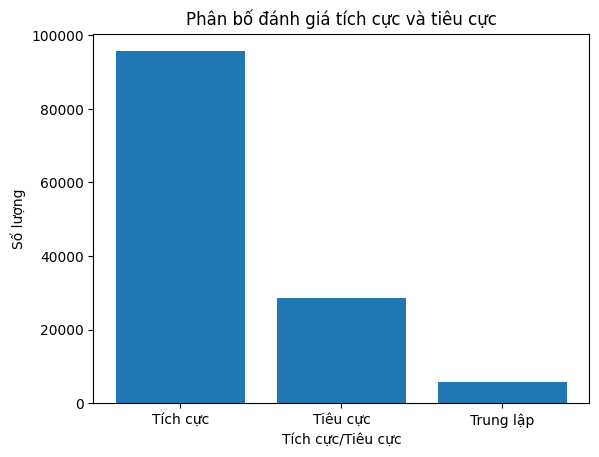

In [ ]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Đường dẫn tới file csv
data_url = "/10k_vietnamese_ecommerce_review.csv"

# Đọc dữ liệu từ file csv
df = pd.read_csv(data_url)

# Tiền xử lý dữ liệu
# Giữ lại các cột cần thiết: nội dung và điểm đánh giá
df = df[['content', 'score']]
# Loại bỏ các dòng có giá trị bị thiếu
df = df.dropna()

# Chuẩn hóa nhãn tích cực (score >= 4) và tiêu cực (score <= 2)
df['sentiment'] = np.where(df['score'] >= 4, 'Tích cực', np.where(df['score'] <= 2, 'Tiêu cực', 'Trung lập'))

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X = df['content']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vector hóa văn bản
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Xây dựng mô hình Logistic Regression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Đánh giá mô hình
y_pred = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình:", accuracy)
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred))

# Trực quan hóa kết quả
sentiment_counts = df['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Tích cực/Tiêu cực')
plt.ylabel('Số lượng')
plt.title('Phân bố đánh giá tích cực và tiêu cực')
plt.show()


Dùng biểu đồ để trực quan hoá dữ liệu mà không cần dùng mô hình noron hay phi ron để xác định độ dài của các bình luận tích cực hay không tích cực

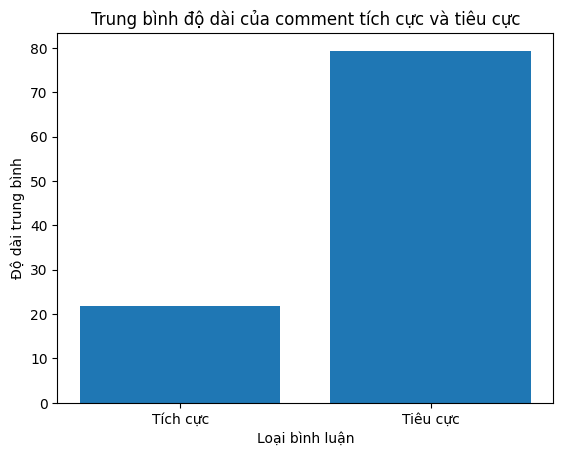

In [ ]:
# Import các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt

# Đường dẫn tới file csv
data_url = "/10k_vietnamese_ecommerce_review.csv"

# Đọc dữ liệu từ file csv
df = pd.read_csv(data_url)

# Tiền xử lý dữ liệu
# Giữ lại các cột cần thiết: nội dung và điểm đánh giá
df = df[['content', 'score']]
# Loại bỏ các dòng có giá trị bị thiếu
df = df.dropna()

# Chuẩn hóa nhãn tích cực (score >= 4) và tiêu cực (score <= 2)
df['sentiment'] = df['score'].apply(lambda x: 'Tích cực' if x >= 4 else ('Tiêu cực' if x <= 2 else 'Trung lập'))

# Tính trung bình độ dài của các comment tích cực và tiêu cực
positive_comments_length = df[df['sentiment'] == 'Tích cực']['content'].apply(len)
avg_positive_length = positive_comments_length.mean()

negative_comments_length = df[df['sentiment'] == 'Tiêu cực']['content'].apply(len)
avg_negative_length = negative_comments_length.mean()

# Trực quan hóa dữ liệu
labels = ['Tích cực', 'Tiêu cực']
avg_lengths = [avg_positive_length, avg_negative_length]

plt.bar(labels, avg_lengths)
plt.xlabel('Loại bình luận')
plt.ylabel('Độ dài trung bình')
plt.title('Trung bình độ dài của comment tích cực và tiêu cực')
plt.show()


Đặt câu hỏi: "Trong tập dữ liệu về đánh giá sản phẩm trên sàn thương mại điện tử Lazada, liệu có mối quan hệ giữa độ dài của comment và tích cực/tiêu cực của đánh giá? Và liệu có sự khác biệt về độ dài trung bình của comment giữa hai nhóm tích cực và tiêu cực không?"

Phân tích trực quan:
1. Vẽ biểu đồ histogram biểu thị phân bố độ dài comment cho cả nhóm tích cực và tiêu cực để xem xem độ dài comment có sự phân tán như thế nào trong hai nhóm.
2. Vẽ biểu đồ boxplot để so sánh sự khác biệt về độ dài comment giữa hai nhóm tích cực và tiêu cực.

Phân tích thống kê:
1. Tính trung bình độ dài comment của cả nhóm tích cực và tiêu cực để so sánh.
2. Tính độ lệch chuẩn của độ dài comment của cả hai nhóm để xem xét mức độ phân tán.

Mô hình noron, biểu diễn độ dài của comment tiêu cực hoặc tích cực với mối tương quan với số lượng của mỗi loại comment

In [ ]:
Phân bố số lượng và độ dài của comment mang tính tiêu cực và tích cực

Mô hình phi noron

Đánh giá mô hình phi nơ-ron:
Độ chính xác: 0.8771929824561403
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       628
           1       0.71      0.71      0.71       170

    accuracy                           0.88       798
   macro avg       0.82      0.82      0.82       798
weighted avg       0.88      0.88      0.88       798



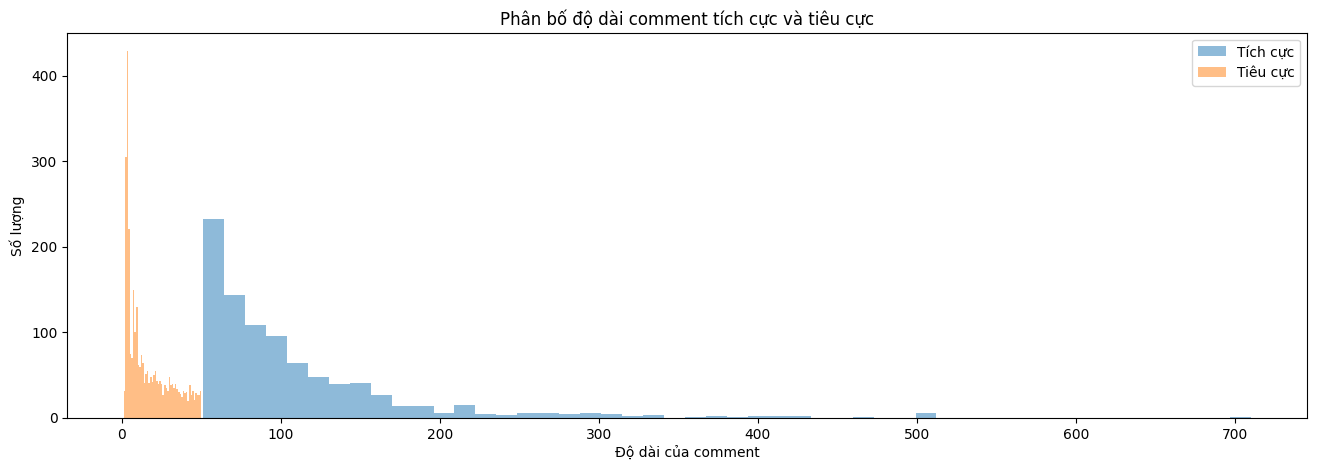

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Đường dẫn tới file csv
data_url = "/10k_vietnamese_ecommerce_review.csv"

# Đọc dữ liệu từ file csv
df = pd.read_csv(data_url)

# Loại bỏ các dòng có dữ liệu trống trong cột 'content'
df = df.dropna(subset=['content'])

# Chuyển đổi dữ liệu trong cột 'content' thành chuỗi (string)
df['content'] = df['content'].astype(str)

# Thêm cột nhãn dựa vào độ dài của comment
threshold = 50  # Ngưỡng độ dài để xác định tích cực hay tiêu cực (thay đổi theo yêu cầu)
df['sentiment_label'] = np.where(df['content'].apply(len) > threshold, 'Tích cực', 'Tiêu cực')

# Tiền xử lý dữ liệu
# Giữ lại các cột cần thiết: nội dung (comment) và nhãn (tiêu cực/tích cực)
df = df[['content', 'sentiment_label']]

# Chuyển đổi nhãn thành dạng số (0 cho 'Tiêu cực', 1 cho 'Tích cực')
df['sentiment_label'] = df['sentiment_label'].map({'Tiêu cực': 0, 'Tích cực': 1})

# Tách dữ liệu thành features và nhãn
X = df['content'].values
y = df['sentiment_label'].values

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Biểu diễn dữ liệu văn bản thành Bag of Words
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Xây dựng và huấn luyện mô hình phi nơ-ron
model_perceptron = Perceptron()

model_perceptron.fit(X_train_vectorized, y_train)

# Đánh giá mô hình phi nơ-ron trên tập kiểm tra
y_pred_perceptron = model_perceptron.predict(X_test_vectorized)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)

print("Đánh giá mô hình phi nơ-ron:")
print("Độ chính xác:", accuracy_perceptron)
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred_perceptron))

# Trực quan hóa dữ liệu tích cực và tiêu cực
plt.figure(figsize=(16, 5))
df['content_length'] = df['content'].apply(len)
plt.hist(df[df['sentiment_label'] == 1]['content_length'], bins=50, alpha=0.5, label='Tích cực')
plt.hist(df[df['sentiment_label'] == 0]['content_length'], bins=50, alpha=0.5, label='Tiêu cực')
plt.xlabel('Độ dài của comment')
plt.ylabel('Số lượng')
plt.title('Phân bố độ dài comment tích cực và tiêu cực')
plt.legend()
plt.show()


Phân tích độ dài của comment tích cực và tiêu cực (dựa trên rating)

<ipython-input-15-d8f31e46dc12>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['score'].apply(lambda x: 'Tích cực' if x >= 4 else 'Tiêu cực')
<ipython-input-15-d8f31e46dc12>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment_length'] = df['content'].apply(len)


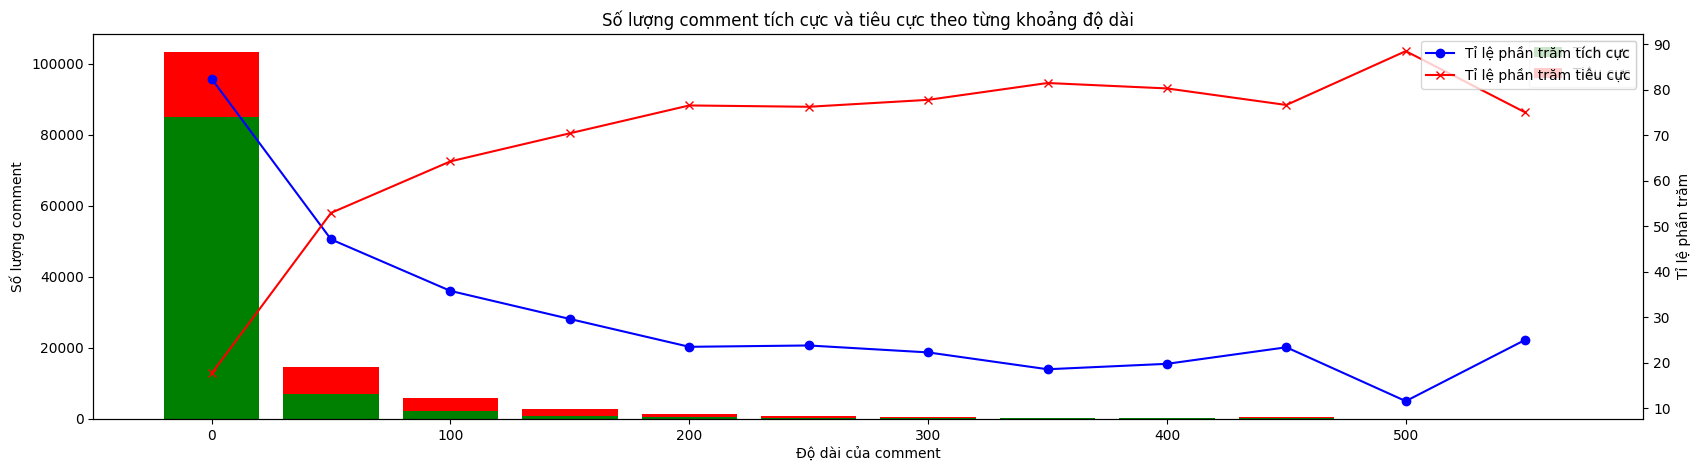

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đường dẫn tới file csv
data_url = "/10k_vietnamese_ecommerce_review.csv"

# Đọc dữ liệu từ file csv
df = pd.read_csv(data_url)

# Tiền xử lý dữ liệu
# Giữ lại các cột cần thiết: nội dung, điểm đánh giá và số rating
df = df[['content', 'score']]
# Loại bỏ các dòng có giá trị bị thiếu
df = df.dropna()

# Chuẩn hóa nhãn tích cực (score >= 4) và tiêu cực (score <= 2)
df['sentiment'] = df['score'].apply(lambda x: 'Tích cực' if x >= 4 else 'Tiêu cực')

# Tạo cột mới 'comment_length' để lưu độ dài của comment
df['comment_length'] = df['content'].apply(len)

# Tạo các khoảng độ dài comment để phân chia
bins = np.arange(0, 601, 50)

# Tính tổng số lượng comment
total_comments = len(df)

# Tính số lượng comment tích cực và tiêu cực theo từng khoảng độ dài
positive_comments_count = df[df['sentiment'] == 'Tích cực']['comment_length'].groupby(pd.cut(df[df['sentiment'] == 'Tích cực']['comment_length'], bins)).count()
negative_comments_count = df[df['sentiment'] == 'Tiêu cực']['comment_length'].groupby(pd.cut(df[df['sentiment'] == 'Tiêu cực']['comment_length'], bins)).count()

# Tính tỉ lệ phần trăm comment tích cực trong mỗi khoảng độ dài
positive_comments_percentage = positive_comments_count / (positive_comments_count + negative_comments_count) * 100

# Tính tỉ lệ phần trăm comment tiêu cực trong mỗi khoảng độ dài
negative_comments_percentage = negative_comments_count / (positive_comments_count + negative_comments_count) * 100

# Trực quan hóa kết quả bằng biểu đồ chồng lên nhau
plt.figure(figsize=(20, 5))

# Biểu đồ cột chồng lên nhau độ dài comment tích cực và tiêu cực
plt.bar(bins[:-1], positive_comments_count, width=40, color='green', align='center', label='Tích cực')
plt.bar(bins[:-1], negative_comments_count, width=40, bottom=positive_comments_count, color='red', align='center', label='Tiêu cực')

plt.xlabel('Độ dài của comment')
plt.ylabel('Số lượng comment')
plt.title('Số lượng comment tích cực và tiêu cực theo từng khoảng độ dài')
plt.legend()

# Biểu đồ đường thể hiện tỉ lệ phần trăm comment tích cực trong mỗi khoảng độ dài
plt.twinx()
plt.plot(bins[:-1], positive_comments_percentage, marker='o', color='blue', label='Tỉ lệ phần trăm tích cực')
plt.plot(bins[:-1], negative_comments_percentage, marker='x', color='red', label='Tỉ lệ phần trăm tiêu cực')

plt.ylabel('Tỉ lệ phần trăm')
plt.legend(loc='upper right')

plt.show()


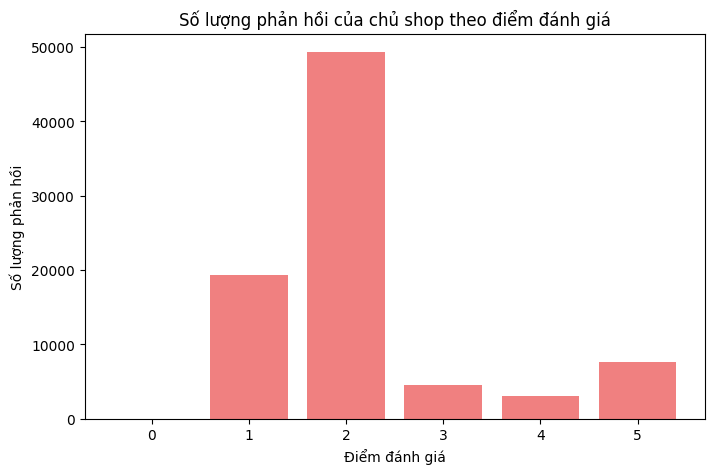

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đường dẫn tới file csv
data_url = "/10k_vietnamese_ecommerce_review.csv"

# Đọc dữ liệu từ file csv
df = pd.read_csv(data_url)

# Tiền xử lý dữ liệu
# Loại bỏ các dòng có giá trị bị thiếu trong cột 'replycontent'
df = df.dropna(subset=['replycontent'])

# Lọc ra các bản ghi có replycontent khác rỗng (đã phản hồi)
replied_df = df[df['replycontent'].notna()]

# Phân tích trực quan
plt.figure(figsize=(8, 5))
plt.bar(replied_df['score'].unique(), replied_df['score'].value_counts(), color='lightcoral')
plt.xlabel('Điểm đánh giá')
plt.ylabel('Số lượng phản hồi')
plt.title('Số lượng phản hồi của chủ shop theo điểm đánh giá')
plt.xticks(replied_df['score'].unique())
plt.show()


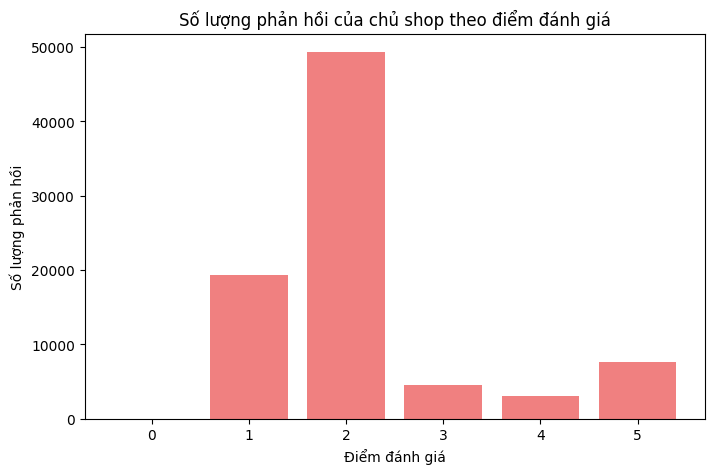

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đường dẫn tới file csv
data_url = "/10k_vietnamese_ecommerce_review.csv"

# Đọc dữ liệu từ file csv
df = pd.read_csv(data_url)

# Tiền xử lý dữ liệu
# Loại bỏ các dòng có giá trị bị thiếu trong cột 'replycontent'
df = df.dropna(subset=['replycontent'])

# Lọc ra các bản ghi có replycontent khác rỗng (đã phản hồi)
replied_df = df[df['replycontent'].notna()]

# Phân tích trực quan
plt.figure(figsize=(8, 5))
plt.bar(replied_df['score'].unique(), replied_df['score'].value_counts(), color='lightcoral')
plt.xlabel('Điểm đánh giá')
plt.ylabel('Số lượng phản hồi')
plt.title('Số lượng phản hồi của chủ shop theo điểm đánh giá')
plt.xticks(replied_df['score'].unique())
plt.show()
